In [3]:
from matplotlib import pyplot as plt
from matplotlib import image
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

2023-05-29 13:27:02.078194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
# Set vars
seed = 42
batch_size = 8

# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 61, 61, 400)       77200     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 28, 28, 400)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 200)       1280200   
                                                                 
 flatten_8 (Flatten)         (None, 33800)             0         
                                                                 
 dense_16 (Dense)            (None, 128)               4326528   
                                                                 
 dense_17 (Dense)            (None, 1)                 129       
                                                      

In [27]:
# Set vars
seed = 42
batch_size = 8

# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(400,
                        kernel_size=(8,8),
                        activation='relu',
                        strides=(2,2),
                        input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D((7,7),
                              strides=(2,2)),
    keras.layers.Conv2D(200,
                        kernel_size=(4,4),
                        activation='relu',
                        strides=(2,2),
                        input_shape=(28, 28, 400)),
    keras.layers.MaxPooling2D((6,6),
                              strides=(2,2)),
    keras.layers.Conv2D(100,
                        kernel_size=(2,2),
                        activation='relu',
                        strides=(1,1),
                        input_shape=(13, 13, 200)),
    keras.layers.Conv2D(50,
                        kernel_size=(3,3),
                        activation='relu',
                        strides=(1,1),
                        input_shape=(3, 3, 100)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 61, 61, 400)       77200     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 28, 28, 400)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 200)       1280200   
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 4, 200)        0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 3, 3, 100)         80100     
                                                                 
 conv2d_33 (Conv2D)          (None, 1, 1, 50)        

In [32]:
from keras import applications
model = keras.Sequential([
    keras.layers.InputLayer((224, 224, 3)),
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.4),
])

model.add(applications.MobileNetV3Large(input_shape=(224, 224, 3),
                                        include_top=False,
                                        weights='imagenet',
                                        pooling='max'
                                       ))

'''model.add(applications.InceptionV3(input_shape=(224, 224, 3),
                                        include_top=False,
                                        weights='imagenet',
                                        pooling='max'
                                       ))'''

model.layers[-1].trainable = False

model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(400, activation='relu'))
model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_3 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_3 (RandomRo  (None, 224, 224, 3)      0         
 tation)                                                         
                                                                 
 MobilenetV3large (Functiona  (None, 960)              2996352   
 l)                                                              
                                                                 
 dense_33 (Dense)            (None, 400)               384400    
                                                                 
 dense_34 (Dense)            (None, 256)               102656    
                                                                 
 dense_35 (Dense)            (None, 128)             

Found 998 files belonging to 2 classes.
Epoch 1/20
88/88 [==============================] - 9s 80ms/step - loss: 1.0984 - accuracy: 0.7679 - val_loss: 0.4414 - val_accuracy: 0.9007
Epoch 2/20
88/88 [==============================] - 7s 78ms/step - loss: 0.4707 - accuracy: 0.8410 - val_loss: 0.3288 - val_accuracy: 0.8874
Epoch 3/20
88/88 [==============================] - 7s 79ms/step - loss: 0.3209 - accuracy: 0.8754 - val_loss: 0.1896 - val_accuracy: 0.9272
Epoch 4/20
88/88 [==============================] - 7s 80ms/step - loss: 0.2269 - accuracy: 0.9169 - val_loss: 0.6031 - val_accuracy: 0.7881
Epoch 5/20
88/88 [==============================] - 7s 75ms/step - loss: 0.2573 - accuracy: 0.8983 - val_loss: 0.2325 - val_accuracy: 0.9205
Epoch 6/20
88/88 [==============================] - 7s 75ms/step - loss: 0.2161 - accuracy: 0.9083 - val_loss: 0.3871 - val_accuracy: 0.8411
Epoch 7/20
88/88 [==============================] - 7s 77ms/step - loss: 0.2117 - accuracy: 0.9069 - val_loss: 0.1

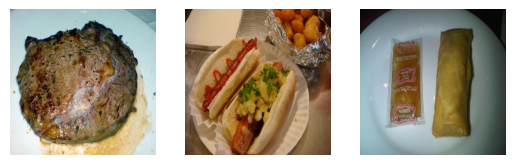

In [33]:
# Load the training and validation data
dataset = keras.preprocessing.image_dataset_from_directory(
    'data',
    labels='inferred',
    image_size=(224, 224),
    shuffle=True
)

an_imgset = next(dataset.as_numpy_iterator())

for i in range(3):
  an_img = an_imgset[0][i]
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(an_img / 256)
  plt.axis("off")

# Split data into train, test, and val
train_size = int(0.7 * 998)
val_size = int(0.15 * 998)
test_size = int(0.15 * 998)

dataset = dataset.unbatch()
train_data = dataset.take(train_size)
test_data = dataset.skip(train_size)
val_data = test_data.skip(test_size)
test_data = test_data.take(test_size)

train_data = train_data.batch(batch_size)
test_data = test_data.batch(batch_size)
val_data = val_data.batch(batch_size)

# Train the model
model.fit(train_data, epochs=20, validation_data=val_data)

In [34]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data)
print('Test accuracy:', accuracy)

19/19 [==============================] - 1s 52ms/step - loss: 0.1280 - accuracy: 0.9732
Test accuracy: 0.9731543660163879


In [35]:
model.save('hotdog_mobilenet')

INFO:tensorflow:Assets written to: hotdog_mobilenet/assets


INFO:tensorflow:Assets written to: hotdog_mobilenet/assets


In [1]:
from tensorflow import keras
model = keras.models.load_model('hotdog_mobilenet')

2023-06-05 19:00:57.937567: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-05 19:01:42.860724: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


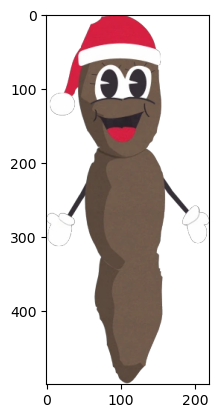

1/1 [==============================] - 0s 420ms/step
No hotdog detected.


In [53]:
import numpy as np
from matplotlib import pyplot as plt

pic = 'examples/nothotdog.jpg'

img = plt.imread(pic)
plt.imshow(img)
plt.show()

# Use the model to predict hotdog or not for a new image
new_image = keras.preprocessing.image.load_img(pic, target_size=(224, 224))
new_image_array = keras.preprocessing.image.img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)
prediction = model.predict(new_image_array)
if prediction[0] < 0.5:
    print('Hotdog detected!')
else:
    print('No hotdog detected.')

In [2]:
model.save('hotdog_mobilenet.h5')